In [49]:
import pandas as pd 
import numpy as np 
from glob import glob
import matplotlib.pyplot as plt 

%matplotlib inline

In [50]:
!ls

background.csv        phantom               readme.txt
calib_wl.csv          process_live.ipynb
live                  process_phantom.ipynb


In [51]:
bg = np.loadtxt("background.csv", delimiter=",")
bg.shape

(5, 1600)

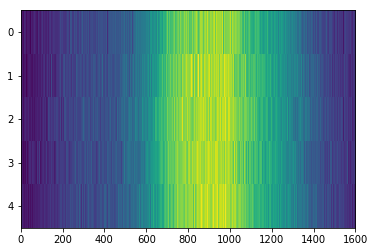

In [52]:
plt.imshow(bg, aspect="auto")

In [53]:
calib_wl = np.loadtxt("calib_wl.csv", delimiter=',')
calib_wl

array([ 538.2643,  538.6086,  538.9529, ..., 1088.1114, 1088.4557,
       1088.8   ])

In [54]:
!ls phantom

phantom_c.csv phantom_h.csv phantom_i.csv phantom_k.csv


In [55]:
phantom_list = glob("phantom/phantom_*.csv")
phantom_list.sort(key=lambda x: x[-5])

In [56]:
phantom_list

['phantom/phantom_c.csv',
 'phantom/phantom_h.csv',
 'phantom/phantom_i.csv',
 'phantom/phantom_k.csv']

In [57]:
d = []
for p in phantom_list:
    d.append(np.loadtxt(p, delimiter=","))

In [58]:
d = np.asarray(d)

In [59]:
d.shape

(4, 5, 1600)

In [60]:
d_sub_bg = d.mean(1) - bg.mean(0)

In [61]:
wl = [i for i in range(650, 1001, 10)]

In [62]:
d_interp = []
for dd in d_sub_bg:
    d_interp.append(np.interp(wl, calib_wl, dd))
    

In [63]:
d_interp = np.asarray(d_interp)
d_interp.shape

(4, 36)

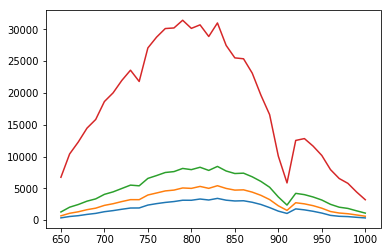

In [64]:
for i in d_interp:
    plt.plot(wl, i)

In [70]:
df_dict = {}
df_dict['wavelength'] = wl
for p, d in zip(phantom_list, d_interp):
    df_dict[p[-5]] = d
df = pd.DataFrame(df_dict)
df.to_csv(os.path.join(path, "spec.csv"), index=None)

,wavelength,c,h,i,k
0,650,354.810049,669.934708,1283.584258,6737.938484
1,660,569.357886,1074.855881,2032.774789,10401.656753
2,670,697.314087,1311.483125,2456.009701,12292.776881
3,680,899.413825,1642.505199,2982.681324,14466.535521
4,690,1059.361255,1880.125007,3338.930003,15827.305664
5,700,1324.499100,2318.439617,4051.636015,18648.646762
6,710,1495.338019,2579.049143,4443.405170,20013.834853
7,720,1708.304676,2918.680453,4974.409352,21960.728667
8,730,1902.583096,3219.348243,5504.394017,23576.704270
9,740,1911.798025,3215.132036,5395.191926,21804.686146
